## COVID-19 data analysis

##Importing Package

In [37]:
import pandas as pd


In [38]:
# URL of the dataset
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/refs/heads/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(url)



In [39]:
from IPython.display import display, Markdown
display(Markdown("### Glimpse Of The Dataset:"))
df.head().style.set_properties(**{
    "background-color": "#8B4513",
    "color": "white",
    "border": "1.5px solid black"
})

### Glimpse Of The Dataset:

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,nan,nan,nan,Afghanistan,2021-01-02 05:22:33,33.939110,67.709953,52513,2201,41727,8585,Afghanistan,134.896578,4.191343
1,nan,nan,nan,Albania,2021-01-02 05:22:33,41.153300,20.168300,58316,1181,33634,23501,Albania,2026.409062,2.025173
2,nan,nan,nan,Algeria,2021-01-02 05:22:33,28.033900,1.659600,99897,2762,67395,29740,Algeria,227.809861,2.764848
3,nan,nan,nan,Andorra,2021-01-02 05:22:33,42.506300,1.521800,8117,84,7463,570,Andorra,10505.403482,1.034865
4,nan,nan,nan,Angola,2021-01-02 05:22:33,-11.202700,17.873900,17568,405,11146,6017,Angola,53.452981,2.305328


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011 entries, 0 to 4010
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3833 non-null   object 
 3   Country_Region       4011 non-null   object 
 4   Last_Update          4011 non-null   object 
 5   Lat                  3922 non-null   float64
 6   Long_                3922 non-null   float64
 7   Confirmed            4011 non-null   int64  
 8   Deaths               4011 non-null   int64  
 9   Recovered            4011 non-null   int64  
 10  Active               4011 non-null   int64  
 11  Combined_Key         4011 non-null   object 
 12  Incident_Rate        3922 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.8+ KB


In [ ]:
df.shape

(4011, 14)

In [41]:
# Check the columns in the dataset
print(df.columns)

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')


In [42]:
# Check for missing values
df.isnull().sum()

,0
FIPS,746
Admin2,741
Province_State,178
Country_Region,0
Last_Update,0
Lat,89
Long_,89
Confirmed,0
Deaths,0
Recovered,0


In [43]:
# Display basic statistics
df.describe()

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
count,3265.000000,3922.000000,3922.000000,4.011000e+03,4011.000000,4.011000e+03,4.011000e+03,3922.000000,3963.000000
mean,32386.688208,35.768908,-71.113714,2.102613e+04,476.518823,1.180731e+04,9.259591e+03,5738.940929,2.228699
std,18017.294540,13.391261,55.220345,1.055172e+05,2833.090464,8.193885e+04,5.719777e+04,3227.374130,17.174874
min,66.000000,-71.949900,-175.198200,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19049.000000,33.202974,-96.580090,7.010000e+02,9.000000,0.000000e+00,5.780000e+02,3536.967442,0.969239
50%,30067.000000,37.910342,-86.708116,1.968000e+03,31.000000,0.000000e+00,1.657000e+03,5840.344304,1.551567
75%,47039.000000,42.181730,-77.358102,7.693500e+03,112.000000,0.000000e+00,4.915500e+03,7752.568815,2.341350
max,99999.000000,71.706900,178.065000,2.636045e+06,81593.000000,2.114760e+06,2.400750e+06,27388.219766,1026.206897


In [44]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Convert the 'Last_Update' column to datetime (if it exists)
df['Last_Update'] = pd.to_datetime(df['Last_Update'], errors='coerce')

# Display the cleaned DataFrame
df_cleaned.head()


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
648,1001.0,Autauga,Alabama,US,2021-01-02 05:22:33,32.539527,-86.644082,4239,50,0,4189,"Autauga, Alabama, US",7587.391935,1.179523
649,1003.0,Baldwin,Alabama,US,2021-01-02 05:22:33,30.727750,-87.722071,13823,169,0,13654,"Baldwin, Alabama, US",6192.157109,1.222600
650,1005.0,Barbour,Alabama,US,2021-01-02 05:22:33,31.868263,-85.387129,1517,33,0,1484,"Barbour, Alabama, US",6145.183505,2.175346
651,1007.0,Bibb,Alabama,US,2021-01-02 05:22:33,32.996421,-87.125115,1854,46,0,1808,"Bibb, Alabama, US",8279.003304,2.481122
652,1009.0,Blount,Alabama,US,2021-01-02 05:22:33,33.982109,-86.567906,4693,63,0,4630,"Blount, Alabama, US",8115.726490,1.342425


In [45]:
# Check for missing values
df_cleaned.isnull().sum()

,0
FIPS,0
Admin2,0
Province_State,0
Country_Region,0
Last_Update,0
Lat,0
Long_,0
Confirmed,0
Deaths,0
Recovered,0


In [ ]:
# Display unique countries and their count
unique_countries = df['Country_Region'].unique()
print(f"Unique countries ({len(unique_countries)}):")
print(unique_countries)


Unique countries (200):
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Ital

In [ ]:
unique_provinces = df['Province_State'].unique()
print(f"Unique provinces/states: {len(unique_provinces)}")
print(unique_provinces)


Unique provinces/states: 597
[nan 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Antwerp' 'Brussels' 'East Flanders' 'Flemish Brabant' 'Hainaut' 'Liege'
 'Limburg' 'Luxembourg' 'Namur' 'Unknown' 'Walloon Brabant'
 'West Flanders' 'Acre' 'Alagoas' 'Amapa' 'Amazonas' 'Bahia' 'Ceara'
 'Distrito Federal' 'Espirito Santo' 'Goias' 'Maranhao' 'Mato Grosso'
 'Mato Grosso do Sul' 'Minas Gerais' 'Para' 'Paraiba' 'Parana'
 'Pernambuco' 'Piaui' 'Rio Grande do Norte' 'Rio Grande do Sul'
 'Rio de Janeiro' 'Rondonia' 'Roraima' 'Santa Catarina' 'Sao Paulo'
 'Sergipe' 'Tocantins' 'Alberta' 'British Columbia' 'Diamond Princess'
 'Grand Princess' 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador'
 'Northwest Territories' 'Nova Scotia' 'Nunavut' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Repatriated Travellers' 'Saskatchewan'
 'Yukon' 'Antofagasta' 'Araucania' 'Arica y Parinacota' 'Atacama' 'Aysen'
 'Bi

In [ ]:
print("Number of unique countries:", df['Country_Region'].nunique())
print("Number of unique provinces/states:", df['Province_State'].nunique())

Number of unique countries: 200
Number of unique provinces/states: 596


##Visualization:

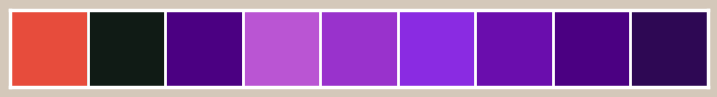

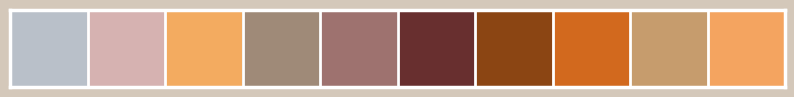

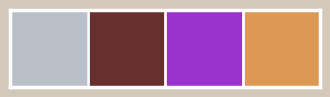

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context("poster",font_scale = .7)

palette = ["#E74C3C","#101B15","#4B0082","#BA55D3", "#9932CC", "#8A2BE2", "#6A0DAD", "#4B0082", "#2E0854"]
#palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette_cmap = ["#B9C0C9","#D6B2B1","#F3AB60","#9F8A78","#9E726F","#682F2F", "#8B4513", "#D2691E", "#C69C6D", "#F4A460"]
cluster = ["#B9C0C9","#682F2F","#9932CC","#DD9954"]

sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_cmap))
sns.palplot(sns.color_palette(cluster))
plt.show()

#682F2F #585858

##Top 10 Countries by Confirmed Cases
This bar chart shows the countries with the highest number of confirmed cases.

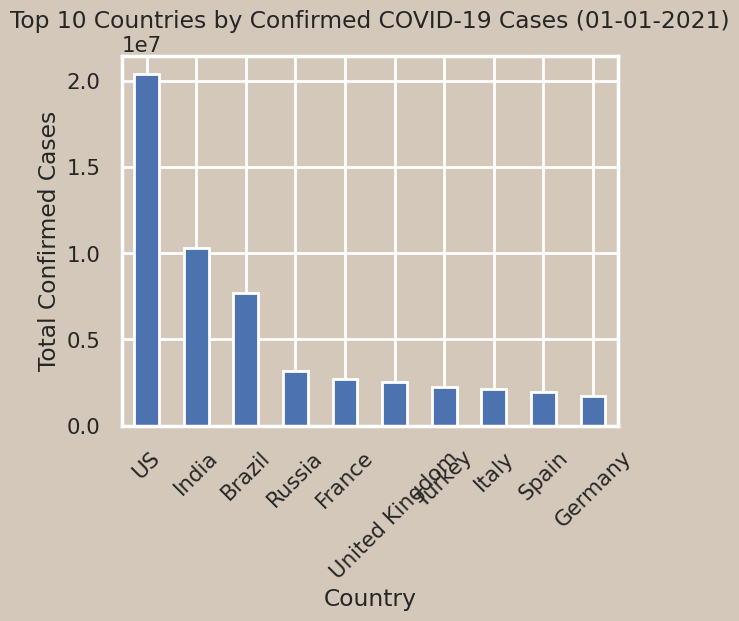

In [14]:
import matplotlib.pyplot as plt

# Plot total confirmed cases by country/region
df.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases (01-01-2021)')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


##Distribution of Cases by Continent Pie Chart
Create a pie chart to show the distribution of total confirmed cases by continent. For this, you may need to manually map countries to continents.

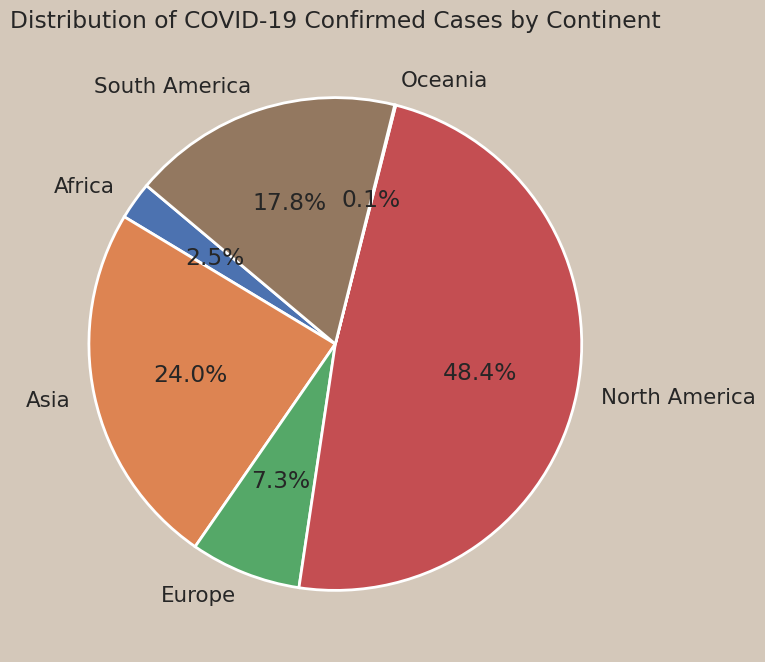

In [16]:
# Simplified continent mapping
continent_map = {
    'US': 'North America', 'Brazil': 'South America', 'India': 'Asia', 'Russia': 'Europe',
    'South Africa': 'Africa', 'Australia': 'Oceania', 'China': 'Asia', 'Canada': 'North America'
}

df['Continent'] = df['Country_Region'].map(continent_map)

# Group by continent and sum confirmed cases
continent_cases = df.groupby('Continent')['Confirmed'].sum()

# Plotwi
plt.figure(figsize=(8, 8))
continent_cases.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of COVID-19 Confirmed Cases by Continent')
plt.ylabel('')
plt.show()


##Correlation Matrix Heatmap
Analyze the correlation between numerical features like Confirmed, Deaths, and Recovered.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


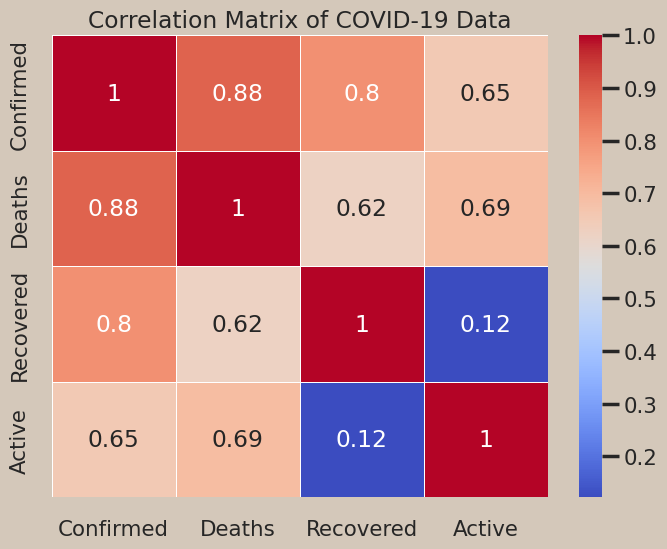

In [19]:
# Select numerical columns
numeric_data = df[['Confirmed', 'Deaths', 'Recovered', 'Active']]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()


##Stacked Bar Chart: Deaths vs Recovered Cases by Top 10 Countries
This chart can show the comparison between the number of deaths and recovered cases for the top 10 affected countries.

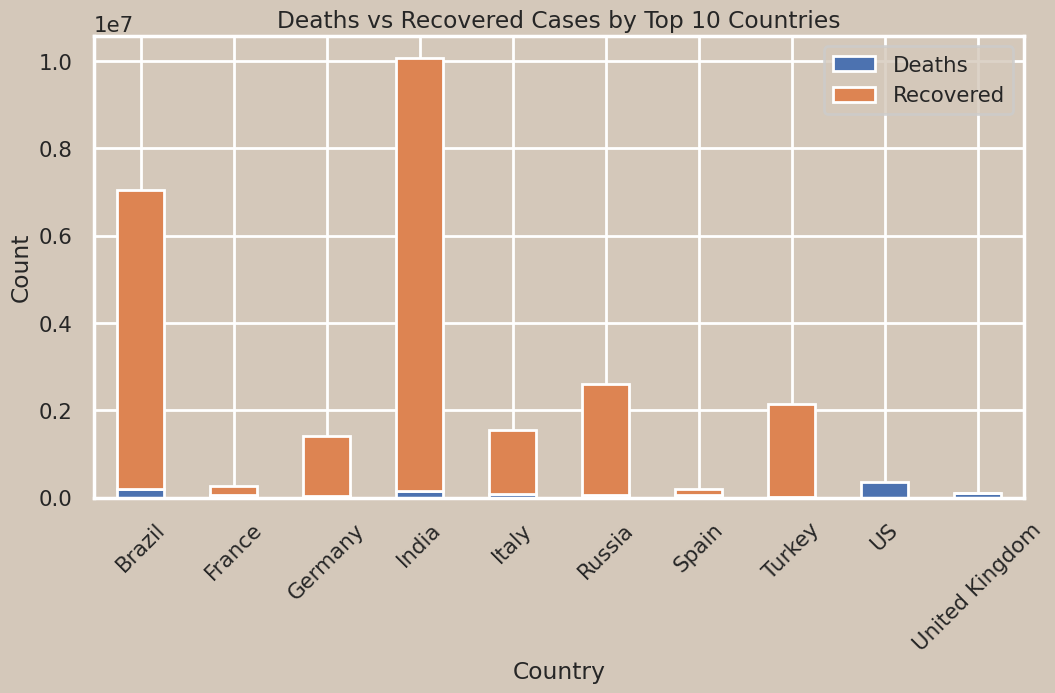

In [20]:
# Get the top 10 countries by confirmed cases
top_10_countries = df.groupby('Country_Region')['Confirmed'].sum().sort_values(ascending=False).head(10).index
filtered_df = df[df['Country_Region'].isin(top_10_countries)]

# Group by country and aggregate the sums
country_data = filtered_df.groupby('Country_Region')[['Deaths', 'Recovered']].sum()

# Plot
country_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Deaths vs Recovered Cases by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['Deaths', 'Recovered'])
plt.show()


In [21]:
# Filter for US data
us_data = df[df['Country_Region'] == 'US']

# Check the total recovered cases in the US
total_recovered_us = us_data['Recovered'].sum()
print(f"Total recovered cases in the US: {total_recovered_us}")


Total recovered cases in the US: 0


## Box Plot: Distribution of Confirmed Cases Across Countries
A box plot can help you understand the spread of confirmed cases across different countries, identifying outliers.

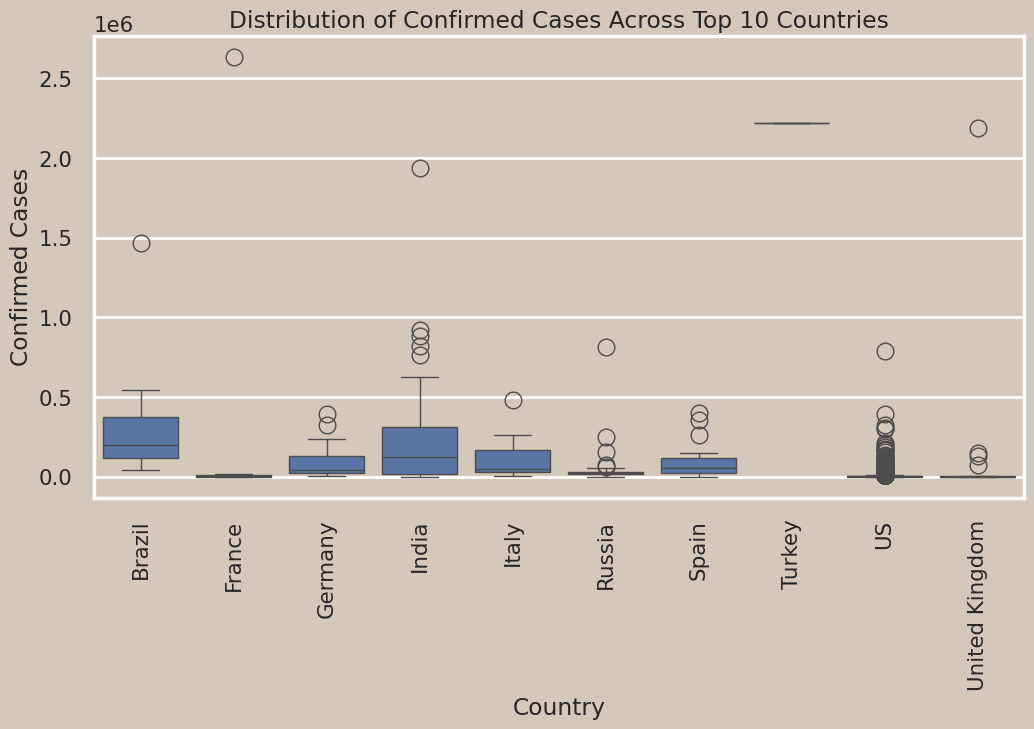

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country_Region', y='Confirmed', data=df[df['Country_Region'].isin(top_10_countries)])
plt.xticks(rotation=90)
plt.title('Distribution of Confirmed Cases Across Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.show()


## Time Series Analysis: Rolling Average of New Cases
A time series plot showing the rolling average of new confirmed cases helps visualize trends and smooth out fluctuations.

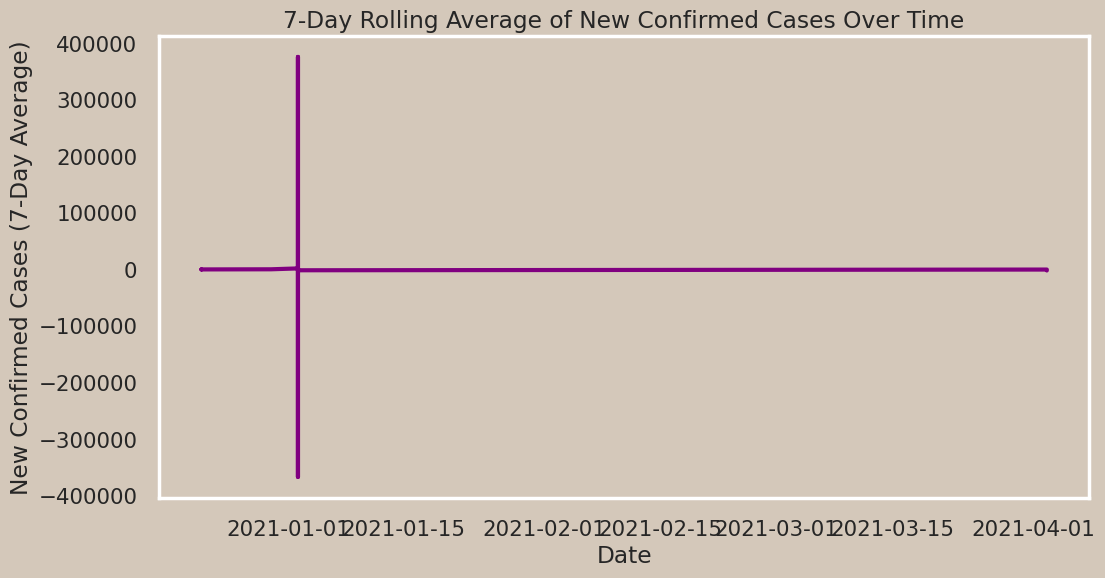

In [ ]:
# Convert 'Last_Update' to datetime and sort by date
df['Last_Update'] = pd.to_datetime(df['Last_Update'], errors='coerce')
df_sorted = df.sort_values(by='Last_Update')

# Calculate rolling average of new cases
df_sorted['New_Cases'] = df_sorted['Confirmed'].diff().fillna(0)
df_sorted['Rolling_Avg'] = df_sorted['New_Cases'].rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['Last_Update'], df_sorted['Rolling_Avg'], color='purple')
plt.title('7-Day Rolling Average of New Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('New Confirmed Cases (7-Day Average)')
plt.grid()
plt.show()


##Bubble Chart: Confirmed Cases, Deaths, and Recovered
A bubble chart can display three variables simultaneously (e.g., confirmed cases, deaths, and recovered cases) using the size of the bubbles.

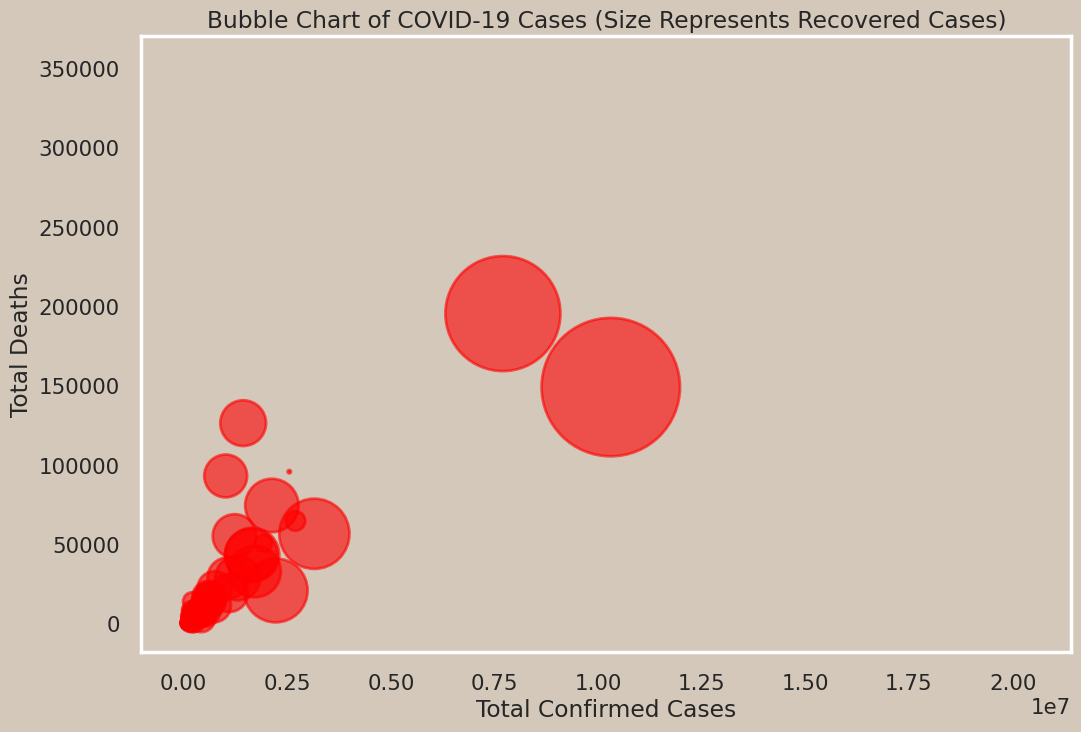

In [ ]:
# Aggregate data by country
bubble_data = df.groupby('Country_Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'}).reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(bubble_data['Confirmed'], bubble_data['Deaths'], s=bubble_data['Recovered'] / 1000, alpha=0.6, color='red')
plt.title('Bubble Chart of COVID-19 Cases (Size Represents Recovered Cases)')
plt.xlabel('Total Confirmed Cases')
plt.ylabel('Total Deaths')
plt.grid()
plt.show()


## Choropleth Map: Global Spread of COVID-19
If you want to go beyond Matplotlib, you can use Plotly for an interactive map visualization.

In [ ]:
import plotly.express as px

# Aggregate data by country
map_data = df.groupby('Country_Region').agg({'Confirmed': 'sum'}).reset_index()

# Create a choropleth map
fig = px.choropleth(map_data,
                    locations='Country_Region',
                    locationmode='country names',
                    color='Confirmed',
                    color_continuous_scale='Viridis',
                    title='Global Spread of COVID-19 (Confirmed Cases)')
fig.show()


## Pair Plot: Exploring Relationships Between Numerical Features
This visualization helps you understand the relationships and correlations between numerical features like Confirmed, Deaths, Recovered, and Active.

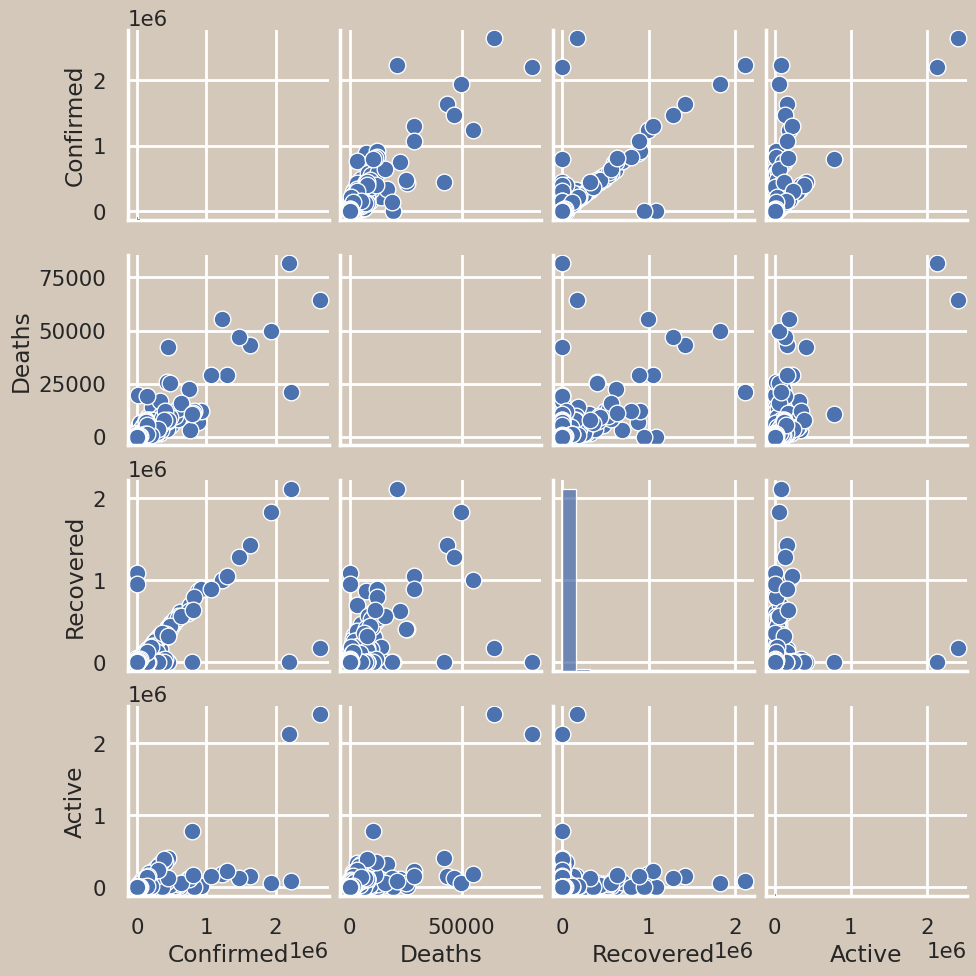

In [47]:
sns.pairplot(df[['Confirmed', 'Deaths', 'Recovered', 'Active']].dropna())
plt.show()


## Donut Chart: Proportion of Active, Recovered, and Deaths
A donut chart is a variation of a pie chart, and it’s useful for showing proportions.

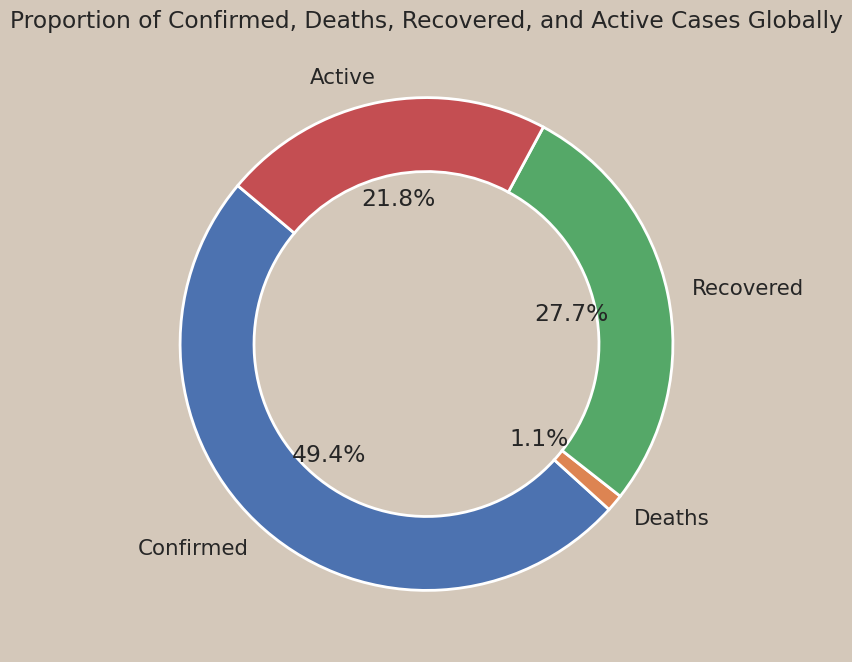

In [23]:
# Aggregate global totals
totals = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(totals, labels=['Confirmed', 'Deaths', 'Recovered', 'Active'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
plt.title('Proportion of Confirmed, Deaths, Recovered, and Active Cases Globally')
plt.show()


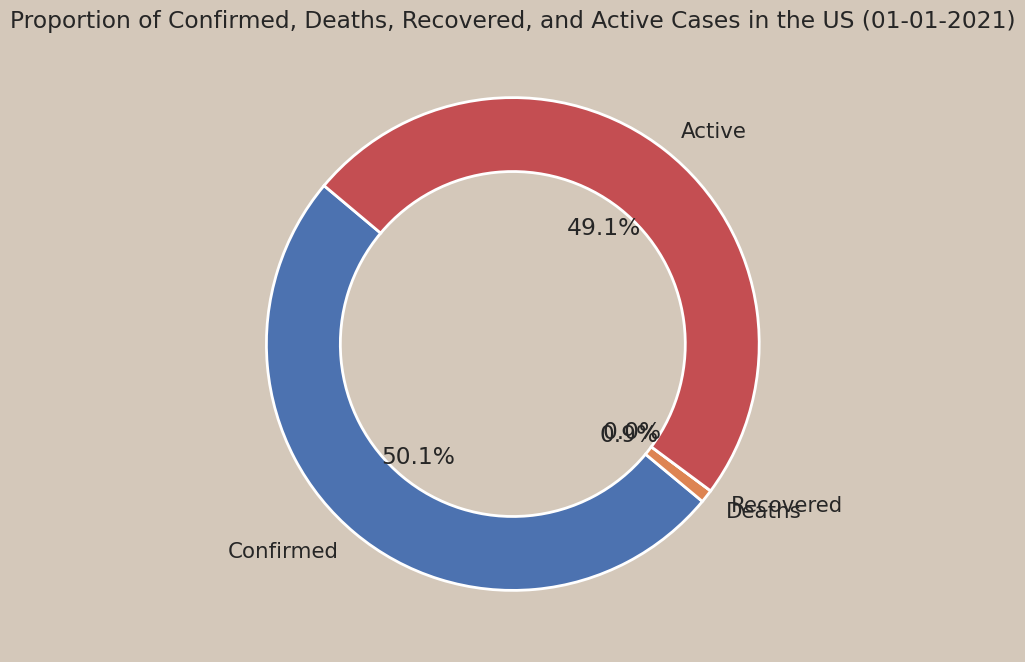

In [24]:
# Filter the data for the US
us_data = df[df['Country_Region'] == 'US']

# Aggregate totals for the US
us_totals = us_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(us_totals, labels=['Confirmed', 'Deaths', 'Recovered', 'Active'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
plt.title('Proportion of Confirmed, Deaths, Recovered, and Active Cases in the US (01-01-2021)')
plt.show()

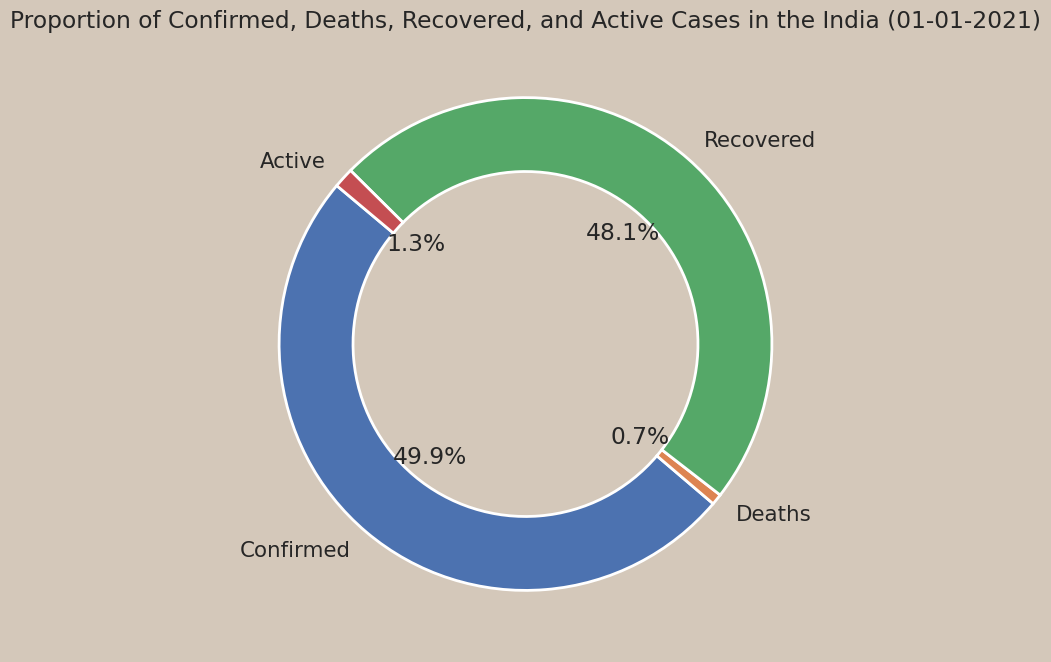

In [25]:
# Filter the data for the India
india_data = df[df['Country_Region'] == 'India']

# Aggregate totals for the India
india_totals = india_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(india_totals, labels=['Confirmed', 'Deaths', 'Recovered', 'Active'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
plt.title('Proportion of Confirmed, Deaths, Recovered, and Active Cases in the India (01-01-2021)')
plt.show()

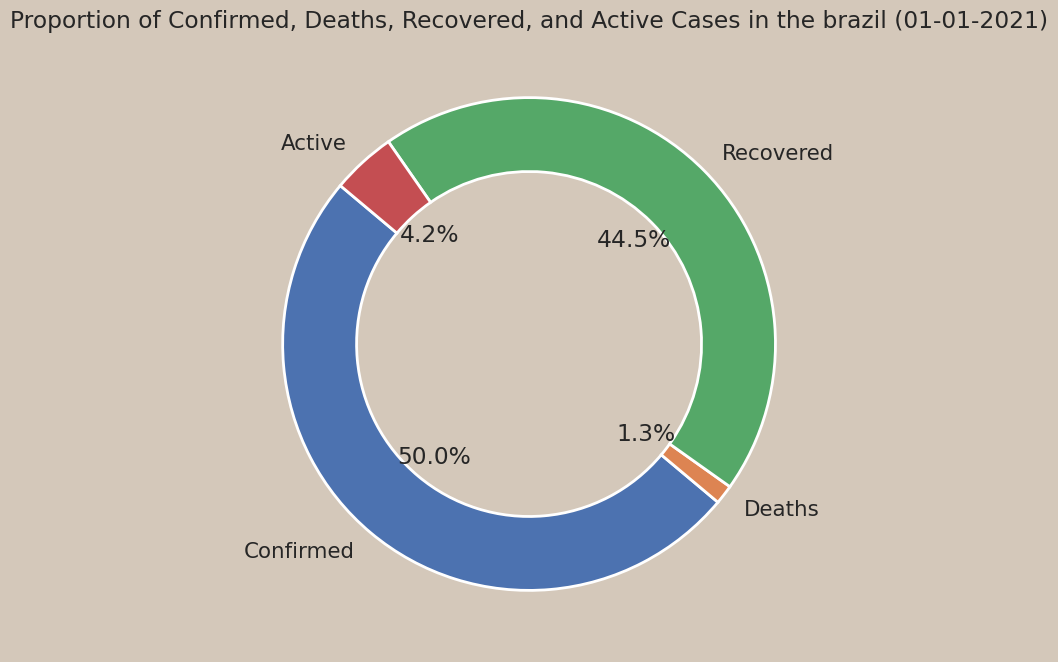

In [26]:
# Filter the data for the Brazil
brazil_data = df[df['Country_Region'] == 'Brazil']

# Aggregate totals for the Brazil
brazil_totals = brazil_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(brazil_totals, labels=['Confirmed', 'Deaths', 'Recovered', 'Active'], autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.3})
plt.title('Proportion of Confirmed, Deaths, Recovered, and Active Cases in the brazil (01-01-2021)')
plt.show()

In [27]:
# Group by 'Country_Region' and sum the 'Confirmed' cases
country_totals = df.groupby('Country_Region')['Confirmed'].sum()

# Find the country with the most confirmed cases
most_confirmed_country = country_totals.idxmax()
most_confirmed_cases = country_totals.max()

print(f"The country with the most confirmed COVID-19 cases is: {most_confirmed_country}")
print(f"Total confirmed cases: {most_confirmed_cases}")

The country with the most confirmed COVID-19 cases is: US
Total confirmed cases: 20397401


##Which Countries Have the Highest Number of Confirmed, Recovered, and Death Cases?

Top 10 countries by confirmed cases:
Country_Region
US                20397401
India             10305788
Brazil             7703971
Russia             3153960
France             2697014
United Kingdom     2549671
Turkey             2220855
Italy              2129376
Spain              1928265
Germany            1721839
Name: Confirmed, dtype: int64

Top 10 countries by recovered cases:
Country_Region
India        9929568
Brazil       6855372
Russia       2553467
Turkey       2114760
Colombia     1520548
Italy        1479988
Argentina    1426676
Germany      1388744
Mexico       1083768
Poland       1046281
Name: Recovered, dtype: int64

Top 10 countries by deaths:
Country_Region
US                352844
Brazil            195541
India             149218
Mexico            126507
United Kingdom     95917
Peru               93231
Italy              74621
France             64891
Russia             56798
Iran               55337
Name: Deaths, dtype: int64


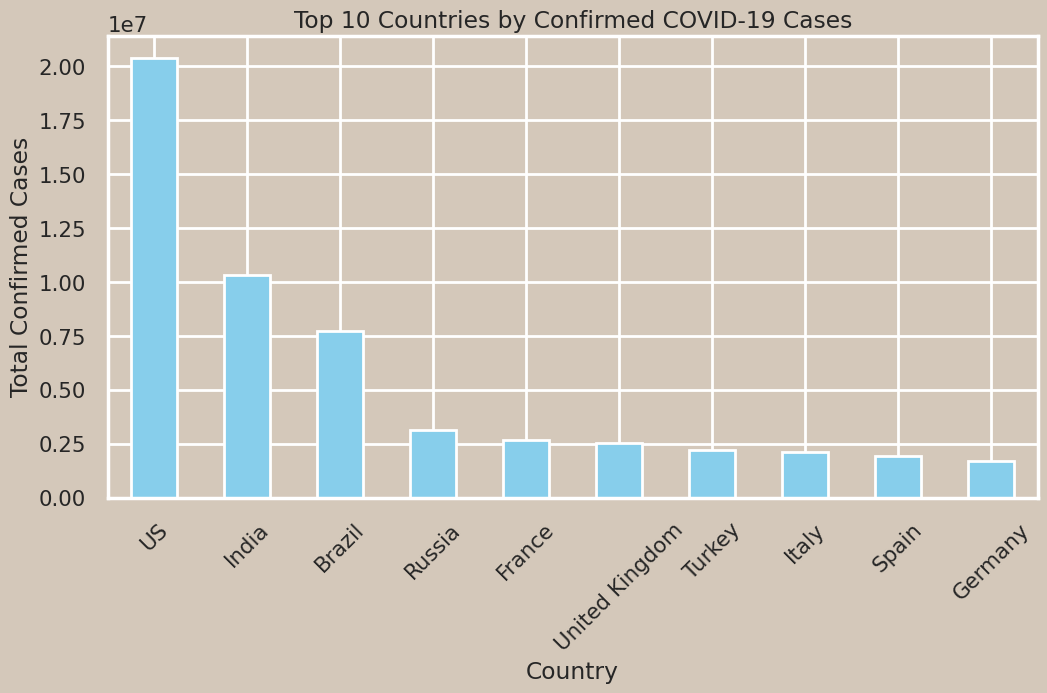

In [28]:
# Group by 'Country_Region' and sum the columns
country_totals = df.groupby('Country_Region')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Sort and display the top 10 countries for each category
top_10_confirmed = country_totals['Confirmed'].sort_values(ascending=False).head(10)
top_10_recovered = country_totals['Recovered'].sort_values(ascending=False).head(10)
top_10_deaths = country_totals['Deaths'].sort_values(ascending=False).head(10)

print("Top 10 countries by confirmed cases:")
print(top_10_confirmed)
print("\nTop 10 countries by recovered cases:")
print(top_10_recovered)
print("\nTop 10 countries by deaths:")
print(top_10_deaths)

# Plot the top 10 countries by confirmed cases
plt.figure(figsize=(12, 6))
top_10_confirmed.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


##How Has the Number of Confirmed Cases Changed Over Time Globally?

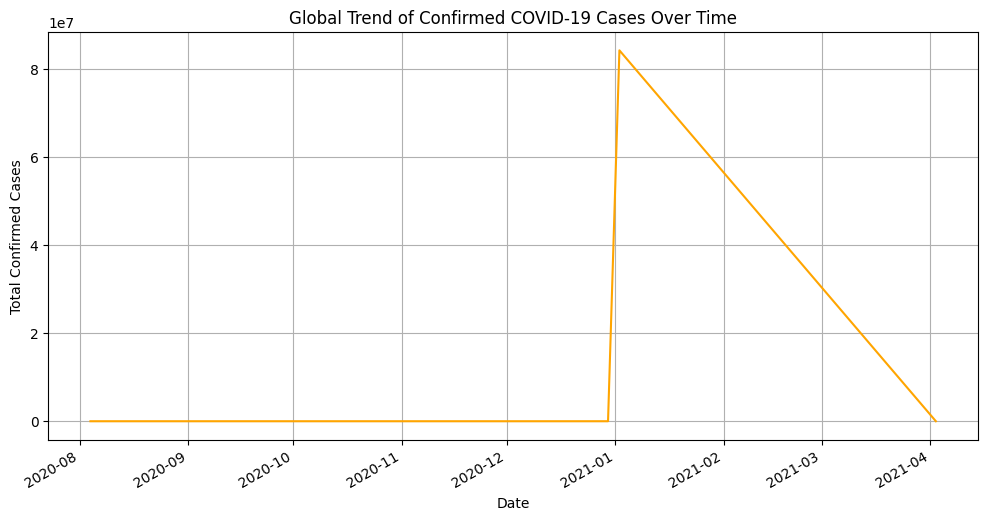

In [ ]:
# Convert 'Last_Update' to datetime format
df['Last_Update'] = pd.to_datetime(df['Last_Update'], errors='coerce')

# Group by date and sum the confirmed cases
time_series = df.groupby('Last_Update')['Confirmed'].sum()

# Plot the time series trend
plt.figure(figsize=(12, 6))
time_series.plot(kind='line', color='orange')
plt.title('Global Trend of Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid()
plt.show()


## Which Countries Have the Highest Active Cases?

Top 10 countries by active cases:
Country_Region
US                20044557
United Kingdom     2448072
France             2431301
Spain              1727052
Netherlands         795341
Brazil              653058
Belgium             628708
Italy               574767
Russia              543695
Sweden              428652
Name: Active_Cases, dtype: int64


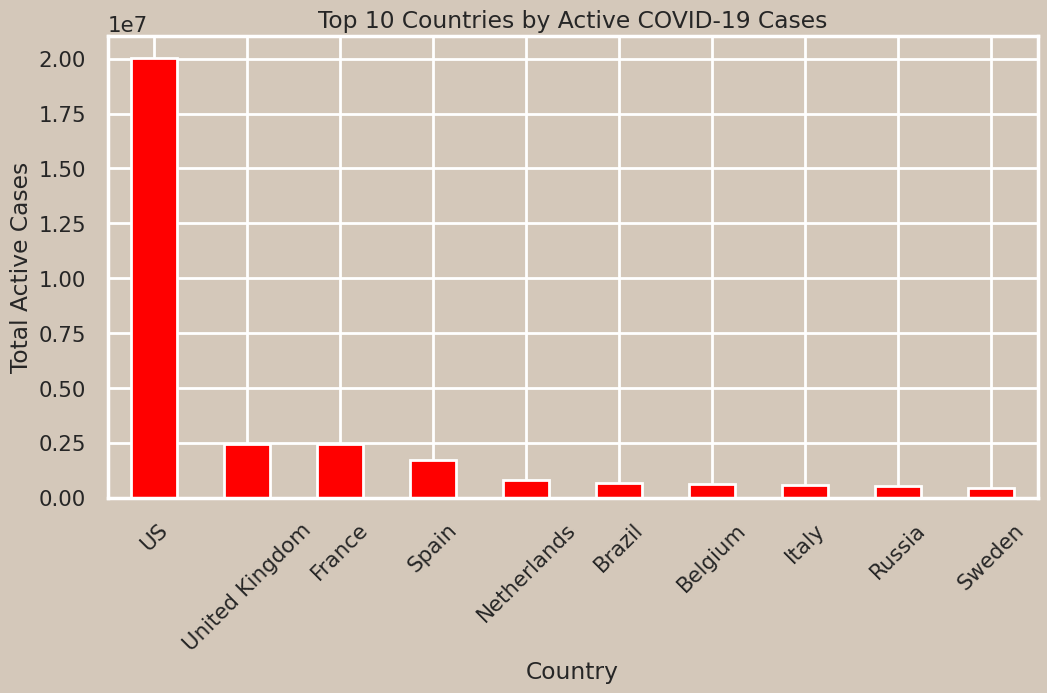

In [29]:
# Calculate the active cases (Confirmed - Recovered - Deaths)
country_totals['Active_Cases'] = country_totals['Confirmed'] - country_totals['Recovered'] - country_totals['Deaths']

# Display the top 10 countries with the highest active cases
top_10_active_cases = country_totals['Active_Cases'].sort_values(ascending=False).head(10)

print("Top 10 countries by active cases:")
print(top_10_active_cases)

# Plot the top 10 countries by active cases
plt.figure(figsize=(12, 6))
top_10_active_cases.plot(kind='bar', color='red')
plt.title('Top 10 Countries by Active COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Total Active Cases')
plt.xticks(rotation=45)
plt.show()


##What Are the Top 10 States/Provinces with the Most Confirmed Cases in the US?

Top 10 states in the US by confirmed cases:
Province_State
California        2434974
Texas             1822635
Florida           1323315
New York           995816
Illinois           963389
Ohio               700380
Georgia            677589
Pennsylvania       657071
Tennessee          592167
North Carolina     539545
Name: Confirmed, dtype: int64


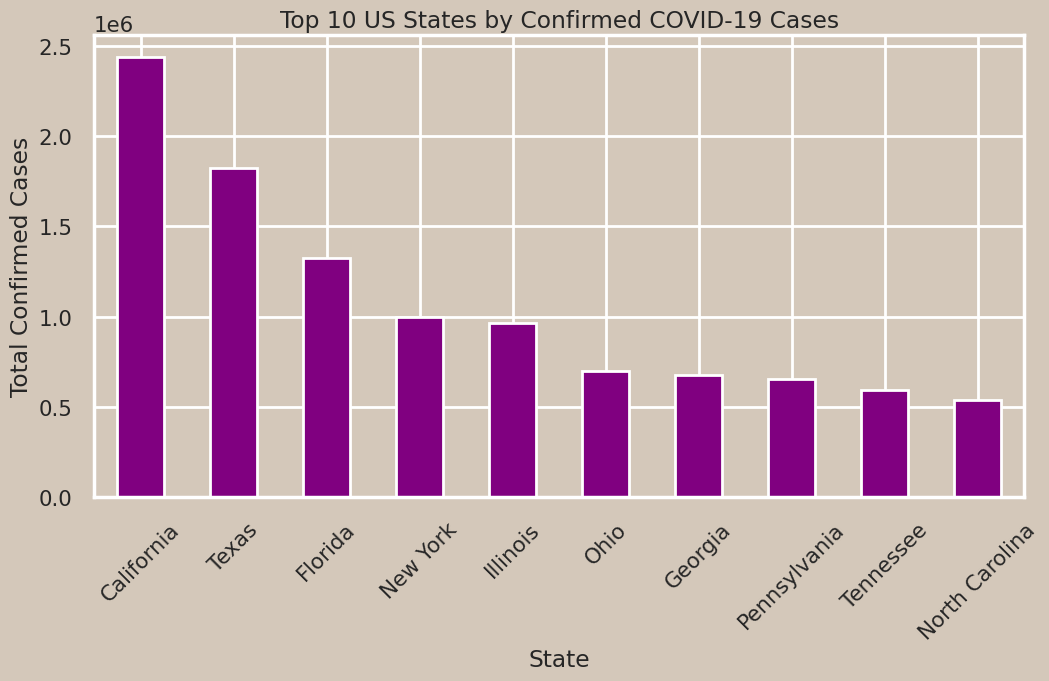

In [30]:
# Filter the data for the US
us_data = df[df['Country_Region'] == 'US']

# Group by 'Province_State' and sum the confirmed cases
us_state_totals = us_data.groupby('Province_State')['Confirmed'].sum()

# Get the top 10 states
top_10_us_states = us_state_totals.sort_values(ascending=False).head(10)

print("Top 10 states in the US by confirmed cases:")
print(top_10_us_states)

# Plot the top 10 US states by confirmed cases
plt.figure(figsize=(12, 6))
top_10_us_states.plot(kind='bar', color='purple')
plt.title('Top 10 US States by Confirmed COVID-19 Cases')
plt.xlabel('State')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


##Is There a Correlation Between Confirmed Cases and the Number of Deaths or Recoveries?

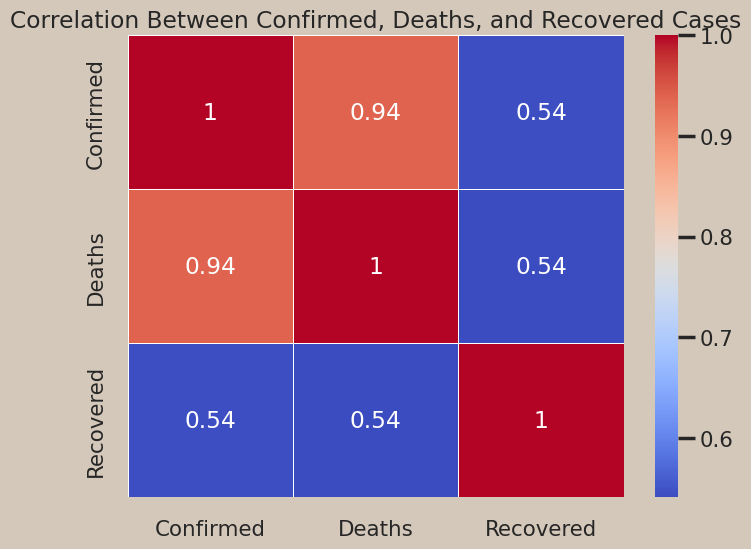

In [31]:
# Calculate the correlation matrix
correlation_matrix = country_totals[['Confirmed', 'Deaths', 'Recovered']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Confirmed, Deaths, and Recovered Cases')
plt.show()


##How Does the Spread of COVID-19 Differ Between Continents?

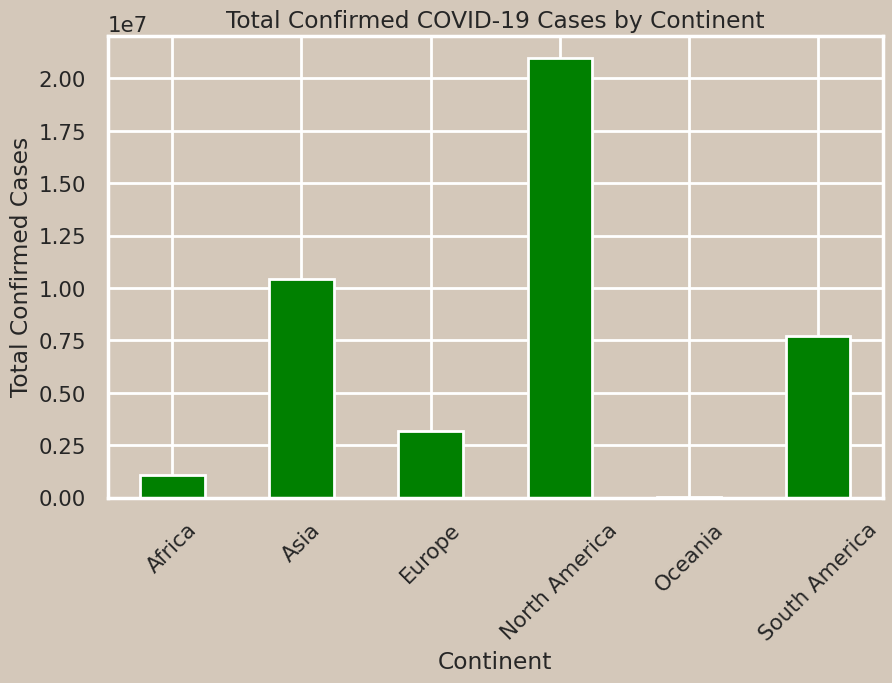

In [32]:
# Simplified continent mapping for a few countries
continent_map = {
    'US': 'North America', 'Brazil': 'South America', 'India': 'Asia', 'Russia': 'Europe',
    'South Africa': 'Africa', 'Australia': 'Oceania', 'China': 'Asia', 'Canada': 'North America'
}
df['Continent'] = df['Country_Region'].map(continent_map)

# Group by continent and sum confirmed cases
continent_totals = df.groupby('Continent')['Confirmed'].sum()

# Plot the total confirmed cases by continent
plt.figure(figsize=(10, 6))
continent_totals.plot(kind='bar', color='green')
plt.title('Total Confirmed COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


##Summary
With these analyses, you can answer questions about:

The countries with the most confirmed, recovered, and death cases.
Time series trends of confirmed cases.
Recovery and mortality rates by country.
The highest active cases globally and within the US.
Correlations between confirmed cases and outcomes.
Differences in COVID-19 spread across continents.